## Data Visualization

In this notebook we will cover some of basics of plotting in python, primarily using the [matplotlib](https://matplotlib.org) library.

The examples use the mooring timeseries data available from [NDBC](https://www.ndbc.noaa.gov) in order to demonstrate timeseries, scatterplots, histograms and box plots.

Inspired from: https://datalab.marine.rutgers.edu/2020/10/introduction-to-python-part-2/

In [10]:
# Notebook setup
import xarray as xr

import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

# NDBC Timeseries
Let's load some timeseries data from an NDBC mooring.  We will use this dataset to show how to customize your plot. Also, we will use the power of [Xarray](http://xarray.pydata.org/en/stable/) library in Python to load and process the data.  Xarray is great, especially when dealing with 3D or 4D datasets. 

In [4]:
# Open dataset
ds = xr.open_dataset('https://dods.ndbc.noaa.gov/thredds/dodsC/data/stdmet/44025/44025.ncml')

In [5]:
ds

<xarray.Dataset>
Dimensions:                  (latitude: 1, longitude: 1, time: 456426)
Coordinates:
  * latitude                 (latitude) float32 40.251
  * longitude                (longitude) float32 -73.164
  * time                     (time) datetime64[ns] 1975-10-24T12:00:00 ... 2023-12-18T13:00:00
Data variables:
    wind_dir                 (time, latitude, longitude) float64 ...
    wind_spd                 (time, latitude, longitude) float32 ...
    gust                     (time, latitude, longitude) float32 ...
    wave_height              (time, latitude, longitude) float32 ...
    dominant_wpd             (time, latitude, longitude) timedelta64[ns] ...
    average_wpd              (time, latitude, longitude) timedelta64[ns] ...
    mean_wave_dir            (time, latitude, longitude) float64 ...
    air_pressure             (time, latitude, longitude) float32 ...
    air_temperature          (time, latitude, longitude) float32 ...
    sea_surface_temperature  (time, lat

In [9]:
# Subset the dataset to 1 year
ds = ds.sel(time=slice('2019-01-01','2020-01-01'))

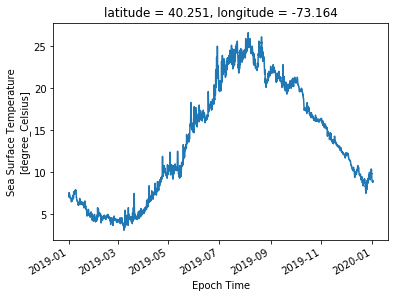

In [11]:
ds.sea_surface_temperature.plot()

## Customizing Timeseries Plots
[Matplotlib](https://matplotlib.org) provides quite a few ways to customize your plot.  

### Customizing Lines
Here are some of the more common parameters you will typically use when creating your plot.

* **linewidth** - For example 0.5, 1, 2...
* **linestyle** - For example '-','--', or ':' or other [basic](https://matplotlib.org/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle) or [advanced](https://matplotlib.org/gallery/lines_bars_and_markers/linestyles.html) styles
* [**color**](https://matplotlib.org/gallery/color/named_colors.html)
* [**marker**](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers)
* **label** - The name of the line, used in a legend (see the next section)

For reference and inspiration, you can also check out the [Matplotlib Gallery](https://matplotlib.org/gallery/index.html) & [xarray plotting](https://docs.xarray.dev/en/latest/user-guide/plotting.html).

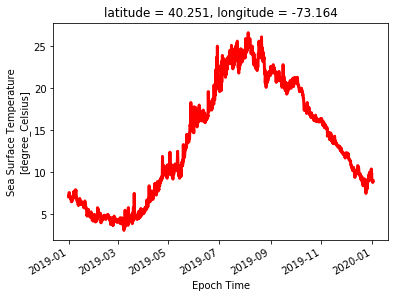

In [12]:
# Line Example
ds.sea_surface_temperature.plot(color='red', linewidth=3)

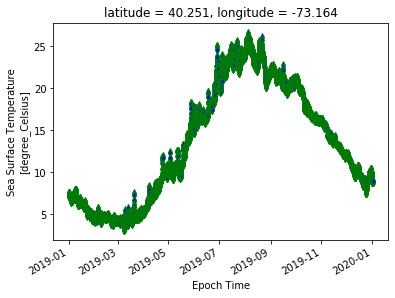

In [14]:
# Custom Markers Example
ds.sea_surface_temperature.plot(color='red', linestyle='', \
                                marker='d', markerfacecolor='b',\
                                markeredgecolor='g', markersize=5)

In [0]:
# Your Turn - Create a graph of air temperature using blue dots

### Customizing the Axis
* Axis Title: `plt.title('Title')`
* Legend: `plt.legend()`
* Axes Labels: `plt.xlabel('Time')` or `plt.ylabel('Temperature')`
* Axes Limits: `plt.ylim([-5,5])`

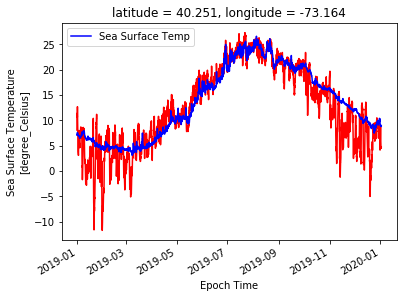

In [15]:
# Incomplete Example
ds.air_temperature.plot(color='red')
ds.sea_surface_temperature.plot(color='blue', label='Sea Surface Temp')
plt.legend()

In [0]:
# Your Turn - Fix the legend, and add a title and y label to the above plot. 

### Customizing Time Axes Limits
There are a few ways you can change the x-axis limits when you are working with timeplots.  By default, plots will show the full range of data, with a little bit of padding on each side.

To plot just the full **Full Time Range** of data, you can use
`plt.xlim(df.index.min(),df.index.max())` 

To plot a **Specific Time Range**, you can use
`plt.xlim(datetime.date(2017,4,1),datetime.date(2019,10,1))`
Note you will need to run `import datetime` first for this command to run.

When you customize date limits you may also need to rotate your tick labels to prevent them from overlapping.  One solution that might work is 
`plt.xticks(rotation=45)`

In [0]:
# Your Turn - Try changing the y and/or x limits for the above plot

### Adding Subplots and Saving
We can create a figure with multiple plots using the subplots feature.

And we can save a figure to a file using `fig.savefig()`

No handles with labels found to put in legend.


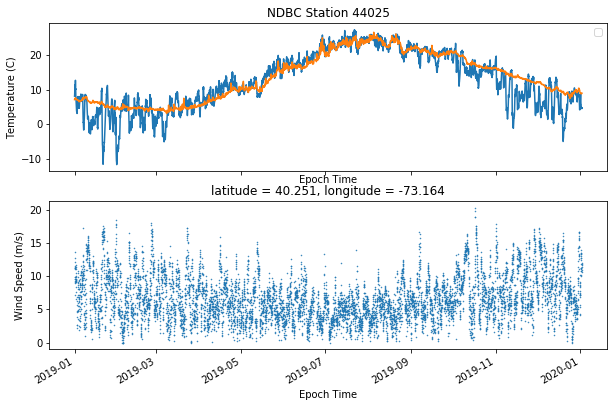

In [16]:
# Subplot example
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,6))

ds.air_temperature.plot(ax=ax1)
ds.sea_surface_temperature.plot(ax=ax1)
ds.wind_spd.plot(ax=ax2, marker='.',linestyle='',markersize=1)

ax1.legend()
ax1.set_ylabel('Temperature (C)')
ax2.set_ylabel('Wind Speed (m/s)')
ax1.set_title('NDBC Station 44025');

# Save the figure to a file
fig.savefig('44025_example.png')

In [0]:
# Your Turn - Recreate the above plot with a 3rd or 4th subplot using other variables

## Scatterplot
When two variables are plotted against each other, this is typically called a scatterplot.  They are really no different than the plots we crated above.  We just need to pick two variables, and use a marker instead of a line.

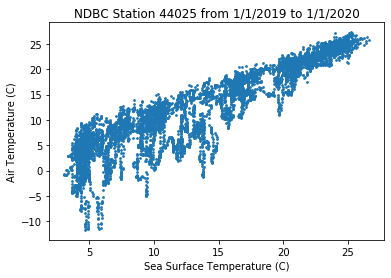

In [23]:
# https://docs.xarray.dev/en/latest/generated/xarray.DataArray.plot.scatter.html
ds.plot.scatter(x='sea_surface_temperature',y='air_temperature', s=3)

plt.xlabel('Sea Surface Temperature (C)')
plt.ylabel('Air Temperature (C)')
plt.title('NDBC Station 44025 from 1/1/2019 to 1/1/2020');

In [0]:
# Your Turn - Create a scatterplot of winds vs. waves

One of the big advantages of the `.scatter()` function, is that you can also color and size the dots based on a variable, rather than having them all be the same.

In [0]:
# Your Turn - Now try coloring it using temperature or time

## Histogram
We can easily create [histograms](https://matplotlib.org/gallery/statistics/hist.html?highlight=histogram) of a single variable.  Use the `bins` parameter to increase or decrease the number of data bins. For use with xarray see also: https://docs.xarray.dev/en/latest/generated/xarray.plot.hist.html

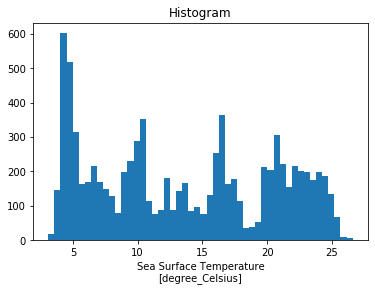

In [43]:
# We can also easily create histograms
ds['sea_surface_temperature'].plot.hist(bins=50);

In [0]:
# Your Turn - Create a histogram of another variable

### Resamble data

In [39]:
monthly_means = ds.sea_surface_temperature[:,0,0].resample(time='M').mean()
monthly_means


<xarray.DataArray 'sea_surface_temperature' (time: 13)>
array([ 6.1175103,  4.565522 ,  4.512757 ,  7.95466  , 12.03459  ,
       17.813581 , 23.064556 , 23.4251   , 20.939165 , 17.77453  ,
       13.810833 ,  9.936474 ,  8.883334 ], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-31 2019-02-28 ... 2020-01-31
    latitude   float32 40.251
    longitude  float32 -73.164

# Additional Resources
If you are interested in seeing some additional examples of the plotting features available in python, I encourage you to visit the following pages.

* [Matplotlib Examples](https://matplotlib.org/gallery/index.html) - See what else this library can do.
* [Xarray Gallery](https://docs.xarray.dev/en/stable/gallery.html) - See the capabilities of Xarray.
* [Altair Example Gallery](https://altair-viz.github.io/gallery/index.html) - A more advanced tool for creating interactive graphs.
* [Python Graph Gallery](https://python-graph-gallery.com/) - A great resource for learning about common data visualization styles and how to create them in python.